# Indicators of Heavy Traffic on I-94

## Table of Contents

1. [**Introduction**](#1)
	- Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries
    - Reading in Data
    - Exploring Data
3. [**Data Analysis & Visualization**](#3)
4. [**Conclusion**](#4)

# 1

## Introduction

### Project Description

In this project, the goal of my analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

### Data Description

This is a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).
John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

# 2

## Acquiring and Loading Data
### Library Import

### Reading in Data

In [1]:
import pandas as pd

In [2]:
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

### Exploring Data

In [3]:
i_94.head()  #first 5 rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i_94.tail()   #last 5 rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# 3


## Data Analysis & Visualization


### Analyzing Traffic Volume

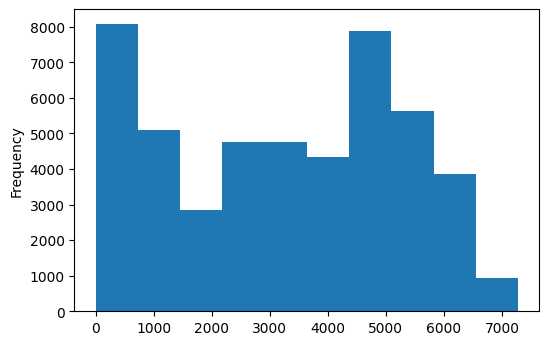

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.show()

In [7]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**Hourly Traffic Volume Range:** The traffic volume varies from 0 to 7,280 cars per hour. The lowest value of 0 indicates that there were times when no cars passed the traffic station during certain hours, possibly during very quiet periods or when the road was closed.

**Average Traffic Volume:** On average, there were 3,260 cars passing the traffic station each hour during this time period.

**Daytime vs. Nighttime Traffic:** The observation that about 25% of the time, there were only 1,193 cars or fewer passing the station each hour suggests that this likely occurred during the night or when road construction or closures reduced traffic. During nighttime hours, traffic tends to be lower as most people are at home and not commuting.

**Comparing High Traffic Periods:** On the other hand, about 25% of the time, the traffic volume was much higher, with 4,933 cars or more passing the station each hour. This could indicate busy daytime periods, peak commuting hours, or special events that lead to increased traffic flow.

### Traffic Volume: Day vs. Night

In [8]:
# Convert the "date_time" column to datetime
i_94['date_time'] = pd.to_datetime(i_94['date_time'])


# Isolate the daytime data (hours from 7 a.m. to 7 p.m.)
day = i_94[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

# Isolate the nighttime data (hours from 7 p.m. to 7 a.m.)
night = i_94[((i_94['date_time'].dt.hour >= 19) & (i_94['date_time'].dt.hour <= 23)) | ((i_94['date_time'].dt.hour >= 0) & (i_94['date_time'].dt.hour < 7))]
print(night.shape)

# The above condition checks if the hour is between 7 p.m. (19) and 11 p.m. (23),
# or between 12 a.m. (0) and 6 a.m. (6) to capture nighttime data.

# Now, daytime_data contains data from 7 a.m. to 6:59 p.m.,
# and nighttime_data contains data from 7 p.m. to 6:59 a.m. (next day).


(23877, 9)
(24327, 9)


### Traffic Volume: Day vs. Night (II)

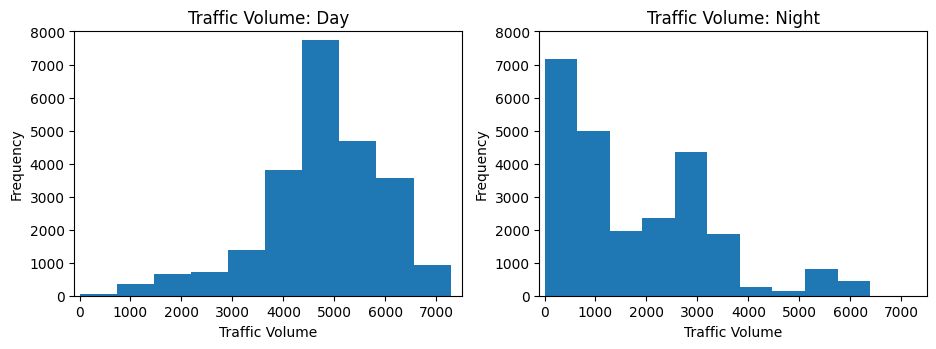

In [9]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()


In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Since our goal is to find indicators of heavy traffic, it might not be ideal to include the nighttime data. Since the traffic is light at night, including nighttime data might introduce noise and might not be representative of heavy traffic patterns, which typically occur during the daytime.

In this case, we will primarily concentrate on the daytime data, as heavy traffic is more likely to occur during peak hours when people are commuting, going to work, or running errands.

### Time Indicators

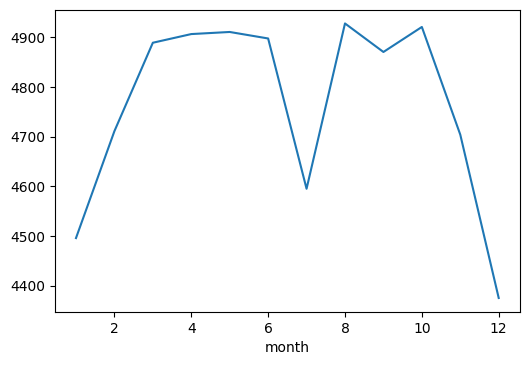

In [12]:
day_copy = day.copy()                      # create a copy of the DataFrame
day_copy['month'] = day_copy['date_time'].dt.month  # extracts the month from the datetime object
by_month = day_copy.groupby('month').mean()     # groupby aggregation method
by_month['traffic_volume'].plot.line()     # generating line plot
plt.show()                                  # displays plot


The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July

### Time Indicators (II)

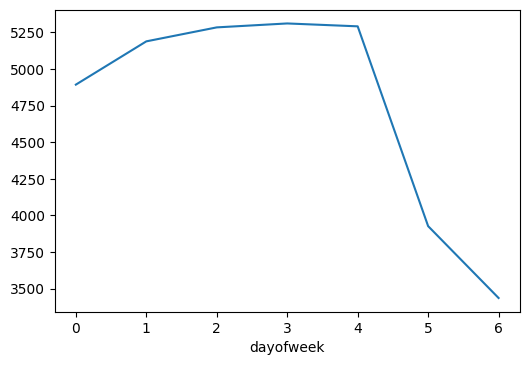

In [13]:
day_copy = day.copy()                                          # create a copy of the DataFrame
day_copy['dayofweek'] = day_copy['date_time'].dt.dayofweek     # extracts the day of the week from the datetime object
by_dayofweek = day_copy.groupby('dayofweek').mean()            # groupby aggregation method
#print(by_dayofweek['traffic_volume'])
by_dayofweek['traffic_volume'].plot.line()
plt.show()

There is a trend of increasing traffic from Monday to Thursday, followed by a relatively stable traffic level on Fridays. During the weekend, traffic volume drops significantly on Saturdays and reaches its lowest point on Sundays.

### Time Indicators (III)

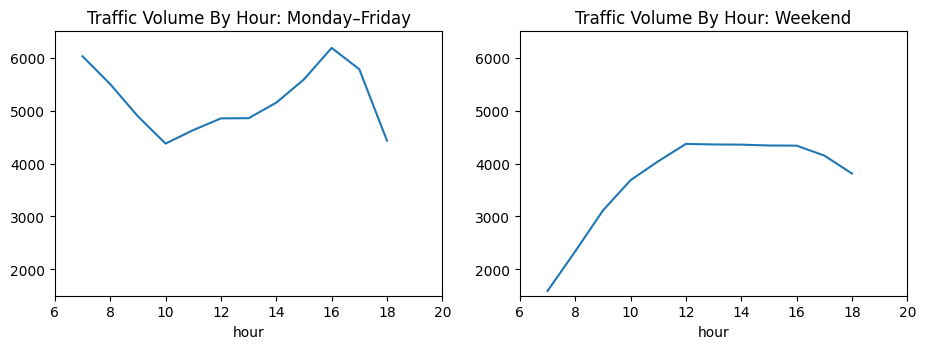

In [15]:
day['hour'] = day['date_time'].dt.hour
day['dayofweek'] = day['date_time'].dt.dayofweek  # Extracts the day of the week from the datetime object

business_days = day.loc[day['dayofweek'] <= 4].copy()  # 4 == Friday
weekend = day.loc[day['dayofweek'] >= 5].copy()        # 5 = Saturday

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()


* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

In [16]:
#finding the correlation betwwen `traffic_volume` and the numerical weather columns
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_value`.

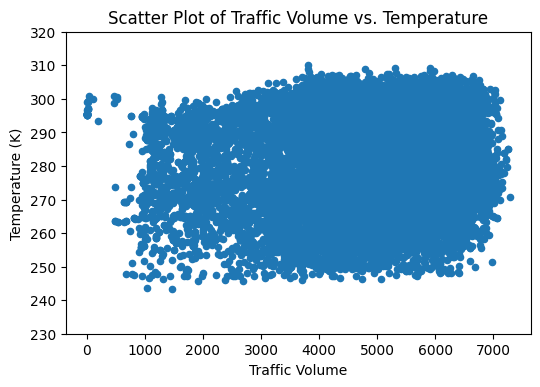

In [17]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)  # Set the y-axis limits to exclude outliers
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature (K)')
plt.title('Scatter Plot of Traffic Volume vs. Temperature')
plt.show()


It can be concluded that temperature doesn't look like a solid indicator of heavy traffic.

### Weather Types

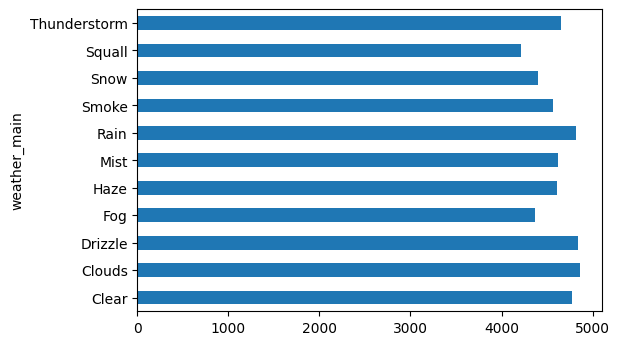

In [18]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. 

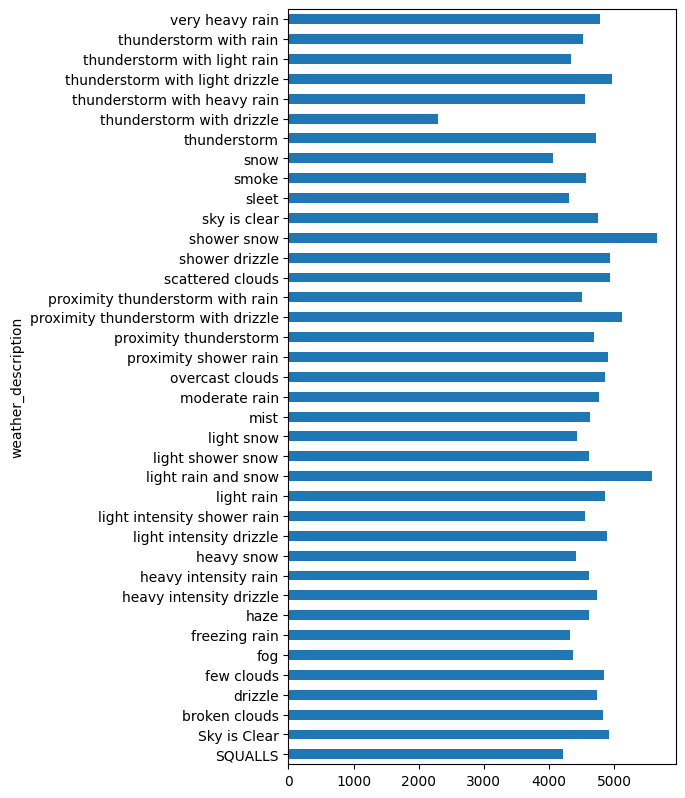

In [19]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

# 4

## Conclusion

Based on the analysis and visualizations performed on the dataset of hourly traffic volume and weather conditions, the following conclusions can be drawn:

1. Traffic Volume Variation: The hourly traffic volume varies significantly over time. The dataset spans multiple years, and the traffic volume can range from very low to high levels. The average traffic volume across all hours is around 3,260 cars.

2. Day-Night Traffic Patterns: Comparing daytime data (7 a.m. to 7 p.m.) with nighttime data (7 p.m. to 7 a.m.), it is evident that traffic volume tends to be higher during the day and decreases during the night. This observation highlights the influence of time of day on traffic patterns.

3. Day of the Week Impact: Traffic volume is lower during weekdays (Monday to Friday) and higher during weekends (Saturday and Sunday). This indicates that weekends tend to experience more traffic compared to weekdays.

4. Weather Impact: Among the weather factors analyzed (temperature, rain, snow, and cloud cover), none of them show strong correlations with traffic volume. While some weak correlations exist, they are not reliable indicators for heavy traffic. Other factors, such as time of day and day of the week, appear to have more significant impacts on traffic volume.

5. Time of Day Influence: The hour of the day shows a moderate positive correlation with traffic volume. Certain hours of the day experience higher traffic volumes, potentially related to rush hours and peak commuting times.









Also in this project, I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. I was able to find two types of indicators:

Time indicators
* The traffic is usually heavier during warm months (March–October) compared to * cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.

Weather indicators
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle